In [2]:
import numpy as np
import pandas as pd
import os.path as op
import sys
import random

In [3]:
raw_data = pd.read_csv('byers_data.csv', index_col=0)

In [6]:
raw_data

,SC4_435_flank,SC4_613_flank,SC4_616_flank,SC4_917_flank,SC4_918_flank,SC4_920_flank,SC39_739_flank,SC39_963_flank,SC39_964_flank,SC16_A1465,SC16_A1466,SC16_A1467,SC49_A1428,SC49_A1430,SC49_A1431
5S_rRNA,4,6,3,1,5,1,2,7,8,2,3,2,11,6,10
7SK,113,88,96,82,81,72,46,46,34,3,3,4,2,1,0
A1BG,28,37,28,25,17,22,89,84,97,8,3,7,9,1,7
A1BG-AS1,234,233,227,172,129,260,213,244,213,43,108,66,105,114,48
A1CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
snoZ6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
snosnR66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
deseq_res = pd.read_csv('fchange_results_final.csv', index_col=0)

In [5]:
sig_list = list(deseq_res['pvalue'])
for i in range(len(sig_list)):
    if sig_list[i] > 0.05:
        sig_list[i] = False
    else:
        sig_list[i] = True

In [6]:
len(sig_list)

27964

In [45]:
deseq_res.sort_values(by='padj')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SRCAP,3826.150000,5.776404e+00,0.140997,40.968300,0.000000e+00,0.000000e+00
MT-RNR2,210998.700000,-2.165509e+01,0.802647,-26.979600,2.565138e-160,3.586575e-156
RPS17,1949.465000,-8.840016e+00,0.338740,-26.096760,3.968184e-150,3.698877e-146
MT-CO3,45500.400000,-1.944180e+01,0.757648,-25.660730,3.209622e-145,2.243846e-141
PSMA2,1111.500000,2.998470e+00,0.117340,25.553780,4.984689e-144,2.787837e-140
...,...,...,...,...,...,...
SPA17P1,1.566332,-4.611536e-04,1.040896,-0.000443,9.996465e-01,9.997895e-01
RP11-167J8.3,0.681099,-4.028036e-04,1.402432,-0.000287,9.997708e-01,9.998781e-01
RP1-60O19.1,0.811947,-2.466896e-04,1.110956,-0.000222,9.998228e-01,9.998943e-01
PPP1R1C,67.910460,1.296248e-04,1.173442,0.000110,9.999119e-01,9.999476e-01


In [11]:
days = list(raw_data.columns)
resistant = ['SC16_A1465', 'SC16_A1466','SC16_A1467','SC49_A1428','SC49_A1430', 'SC49_A1431']
sensitive = ['SC4_435_flank','SC4_613_flank','SC4_616_flank','SC4_917_flank','SC4_918_flank','SC4_920_flank','SC39_739_flank','SC39_963_flank','SC39_964_flank',]

In [8]:
id_list = list(deseq_res.index)
for i in range(len(id_list)):
    id_list[i] = str(id_list[i]) + '_RNA'

data = {}
for day in days:
    # data[day] = pd.DataFrame([deseq_res.index, deseq_res['log2FoldChange'], deseq_res['padj']])
    d = {'identifier':deseq_res.index, 'label':id_list, 'species_type':'gene', 'fold_change':deseq_res['log2FoldChange'], 'p_value':deseq_res['padj'], 'significant':sig_list}
    df = pd.DataFrame(d, index = None)
    if day in resistant:
        df['sample_id'] = 'Resistant'
    else:
        df['sample_id'] = 'Naive'
        df['fold_change'] = 0
    df['source'] = 'rna_seq'
    df = df[['identifier', 'label', 'species_type', 'significant', 'fold_change', 'p_value', 'source','sample_id']]
    data[day] = df

    formatted_data = pd.concat(data.values(), ignore_index=True)

In [35]:
formatted_data.to_csv('formatted_data_final.csv', index=False)

In [12]:
# load the experimental data
from magine.data.experimental_data import load_data
exp_data = load_data('formatted_data_final.csv', low_memory=False)
for i in exp_data.sample_ids:
    print(i)
    display(exp_data[i].head(3))

Naive


,identifier,label,species_type,significant,fold_change,p_value,source,sample_id
0,5S_rRNA,5S_rRNA_RNA,gene,False,0.0,2.297248e-01,rna_seq,Naive
1,7SK,7SK_RNA,gene,True,0.0,7.025436e-16,rna_seq,Naive
2,A1BG,A1BG_RNA,gene,True,0.0,2.401669e-05,rna_seq,Naive


Resistant


,identifier,label,species_type,significant,fold_change,p_value,source,sample_id
251676,5S_rRNA,5S_rRNA_RNA,gene,False,-0.774384,2.297248e-01,rna_seq,Resistant
251677,7SK,7SK_RNA,gene,True,4.646090,7.025436e-16,rna_seq,Resistant
251678,A1BG,A1BG_RNA,gene,True,2.428009,2.401669e-05,rna_seq,Resistant


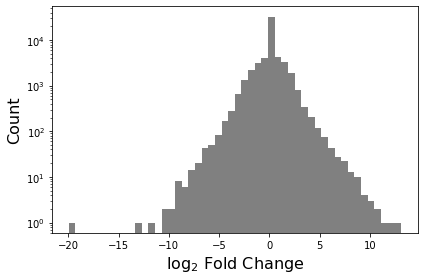

In [13]:
exp_data.rna_seq.plot_histogram();

In [14]:
from IPython.display import display, Image
%matplotlib inline
import matplotlib.pyplot as plt

exp_data.rna_seq.plot_species(['ASCL1', 'NEUROD1', 'POU2F3', 'YAP1', 'MYC'], plot_type='plotly')


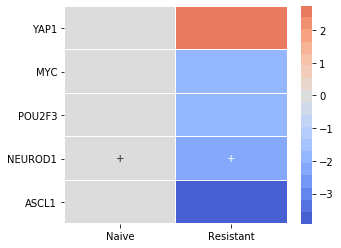

In [15]:
exp_data.rna_seq.heatmap(
    ['ASCL1', 'NEUROD1', 'POU2F3', 'YAP1', 'MYC'],
    figsize=(5,4),
    linewidths=0.01, 
);

# Network Analysis

In [16]:
from magine.networks.network_generator import build_network
import magine.networks.utils as utils
import networkx as nx
import os

2021-11-06 20:54:24.204 - magine - INFO - Logging started on MAGINE version 0.1.5
2021-11-06 20:54:24.204 - magine - INFO - Log entry time offset from UTC: -5.00 hours
WARNING [bioservices:UniChem:112]:  The URL (http://www.ebi.ac.uk/unichem/rest) provided cannot be reached.
WARNING [bioservices:UniChem:112]:  UniChem has added new source. Please update the source_ids attribute in bioservices


In [17]:
measured = exp_data.species.id_list
sig_measured = exp_data.species.sig.id_list
print(len(measured))
print(len(sig_measured))

27964
15012


In [18]:
network = build_network(
    # genes seed species
    seed_species=sig_measured,

    # all data measured, used to allow interconnecting nodes that are not in seeds.
    all_measured_list=measured,

    use_biogrid=True,  # expand with biogrid
    use_hmdb=True,  # expand with hmdb
    use_reactome=True,  # expand with reactome
    use_signor=False,  # expand with signor
    trim_source_sink=True,  # remove all source and sink nodes not measured
    save_name='network'
)
# add attibutes to graph nodes (measured, measured at which time points,
# significantly changed at which time point)
utils.add_data_to_graph(network, exp_data)
print("Saving network")

2021-11-06 20:54:44.367 - magine.networks.databases.kegg_kgml - INFO - Loading KEGG mapping
2021-11-06 20:55:11.051 - magine.networks.network_generator - INFO - Gathering networks
2021-11-06 20:55:11.558 - magine.networks.databases.hmdb - INFO - HMDB : 29859 nodes and 852602 edges
2021-11-06 20:55:11.624 - magine.networks.databases.reactome_functional_interaction - INFO - Reactome : 8714 nodes and 96917 edges
2021-11-06 20:55:11.636 - magine.networks.databases.biogrid_interactions - INFO - BIOGRID: 3037 nodes and 5596 edges
2021-11-06 20:55:11.637 - magine.networks.network_generator - INFO - Merging networks
2021-11-06 20:55:15.959 - magine.networks.network_generator - INFO - 			before	after
2021-11-06 20:55:15.960 - magine.networks.network_generator - INFO - 	Nodes	12183	16320
2021-11-06 20:55:15.966 - magine.networks.network_generator - INFO - 	Edges	64950	154758
2021-11-06 20:55:15.981 - magine.networks.network_generator - INFO - Trimming network
2021-11-06 20:55:20.712 - magine.net

Saving network


In [16]:
# write to gpickle for fast loading in python
# nx.write_gpickle(
#     network,
#     os.path.join('resistance_network.pickle'),
# )

In [19]:
print(network.number_of_nodes())
print(network.number_of_edges())

12812
153526


In [20]:
from magine.networks.subgraphs import Subgraph
from magine.networks.visualization import draw_igraph, draw_graphviz, draw_mpl, draw_cyjs
net_sub = Subgraph(network)

In [21]:
ascl1_neighbors = net_sub.neighbors(
    'ASCL1', # node of interest
    upstream=True, # include upstream nodes
    downstream=False,  # include downstream nodes
    include_only=exp_data.species.sig.id_list # limit nodes to only significant changed species
)

In [20]:
# draw_igraph(network, bbox=[1400, 1400], node_size=15, inline=True)

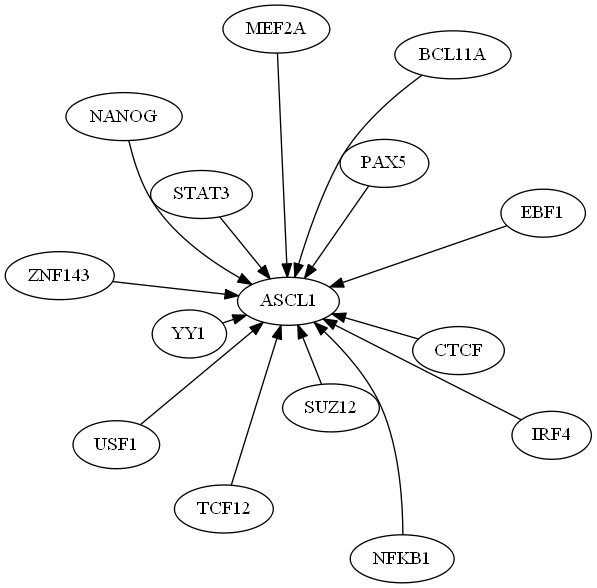

In [113]:
draw_graphviz(ascl1_neighbors, 'fdp')

In [46]:
import pickle
tfs = pickle.load(open('C:/Users/perry/Desktop/Byers/tfs_trimmed_names.pickle','rb'))
tfs = list(tfs)
tf_deseq = deseq_res.loc[deseq_res.index.isin(tfs)]
tf_deseq = tf_deseq.loc[tf_deseq['padj'] < 0.05]
tf_deseq_down = tf_deseq.loc[tf_deseq['log2FoldChange'] < -1 ]
tf_deseq_up = tf_deseq.loc[tf_deseq['log2FoldChange'] > 1 ]
tfs_down = list(tf_deseq_down.index)

In [47]:
changed_tfs = list(tf_deseq_down.index) + list(tf_deseq_up.index)

In [48]:
tf_network = build_network(
    # genes seed species
    seed_species=changed_tfs,

    # all data measured, used to allow interconnecting nodes that are not in seeds.
    # all_measured_list=measured,

    use_biogrid=True,  # expand with biogrid
    use_hmdb=True,  # expand with hmdb
    use_reactome=True,  # expand with reactome
    use_signor=False,  # expand with signor
    trim_source_sink=True,  # remove all source and sink nodes not measured
    save_name='tf_network'
)
# add attibutes to graph nodes (measured, measured at which time points,
# significantly changed at which time point)
# utils.add_data_to_graph(tf_network, exp_data)
# print("Saving network")

2021-11-04 15:18:01.766 - magine.networks.databases.kegg_kgml - INFO - Loading KEGG mapping
2021-11-04 15:18:13.799 - magine.networks.network_generator - INFO - Gathering networks
2021-11-04 15:18:14.249 - magine.networks.databases.hmdb - INFO - HMDB : 29859 nodes and 852602 edges
2021-11-04 15:18:14.310 - magine.networks.databases.reactome_functional_interaction - INFO - Reactome : 8714 nodes and 96917 edges
2021-11-04 15:18:14.318 - magine.networks.databases.biogrid_interactions - INFO - BIOGRID: 3037 nodes and 5596 edges
2021-11-04 15:18:14.319 - magine.networks.network_generator - INFO - Merging networks
2021-11-04 15:18:17.730 - magine.networks.network_generator - INFO - 			before	after
2021-11-04 15:18:17.731 - magine.networks.network_generator - INFO - 	Nodes	9294	9444
2021-11-04 15:18:17.734 - magine.networks.network_generator - INFO - 	Edges	35815	85943
2021-11-04 15:18:17.743 - magine.networks.network_generator - INFO - Trimming network
2021-11-04 15:18:20.152 - magine.networ

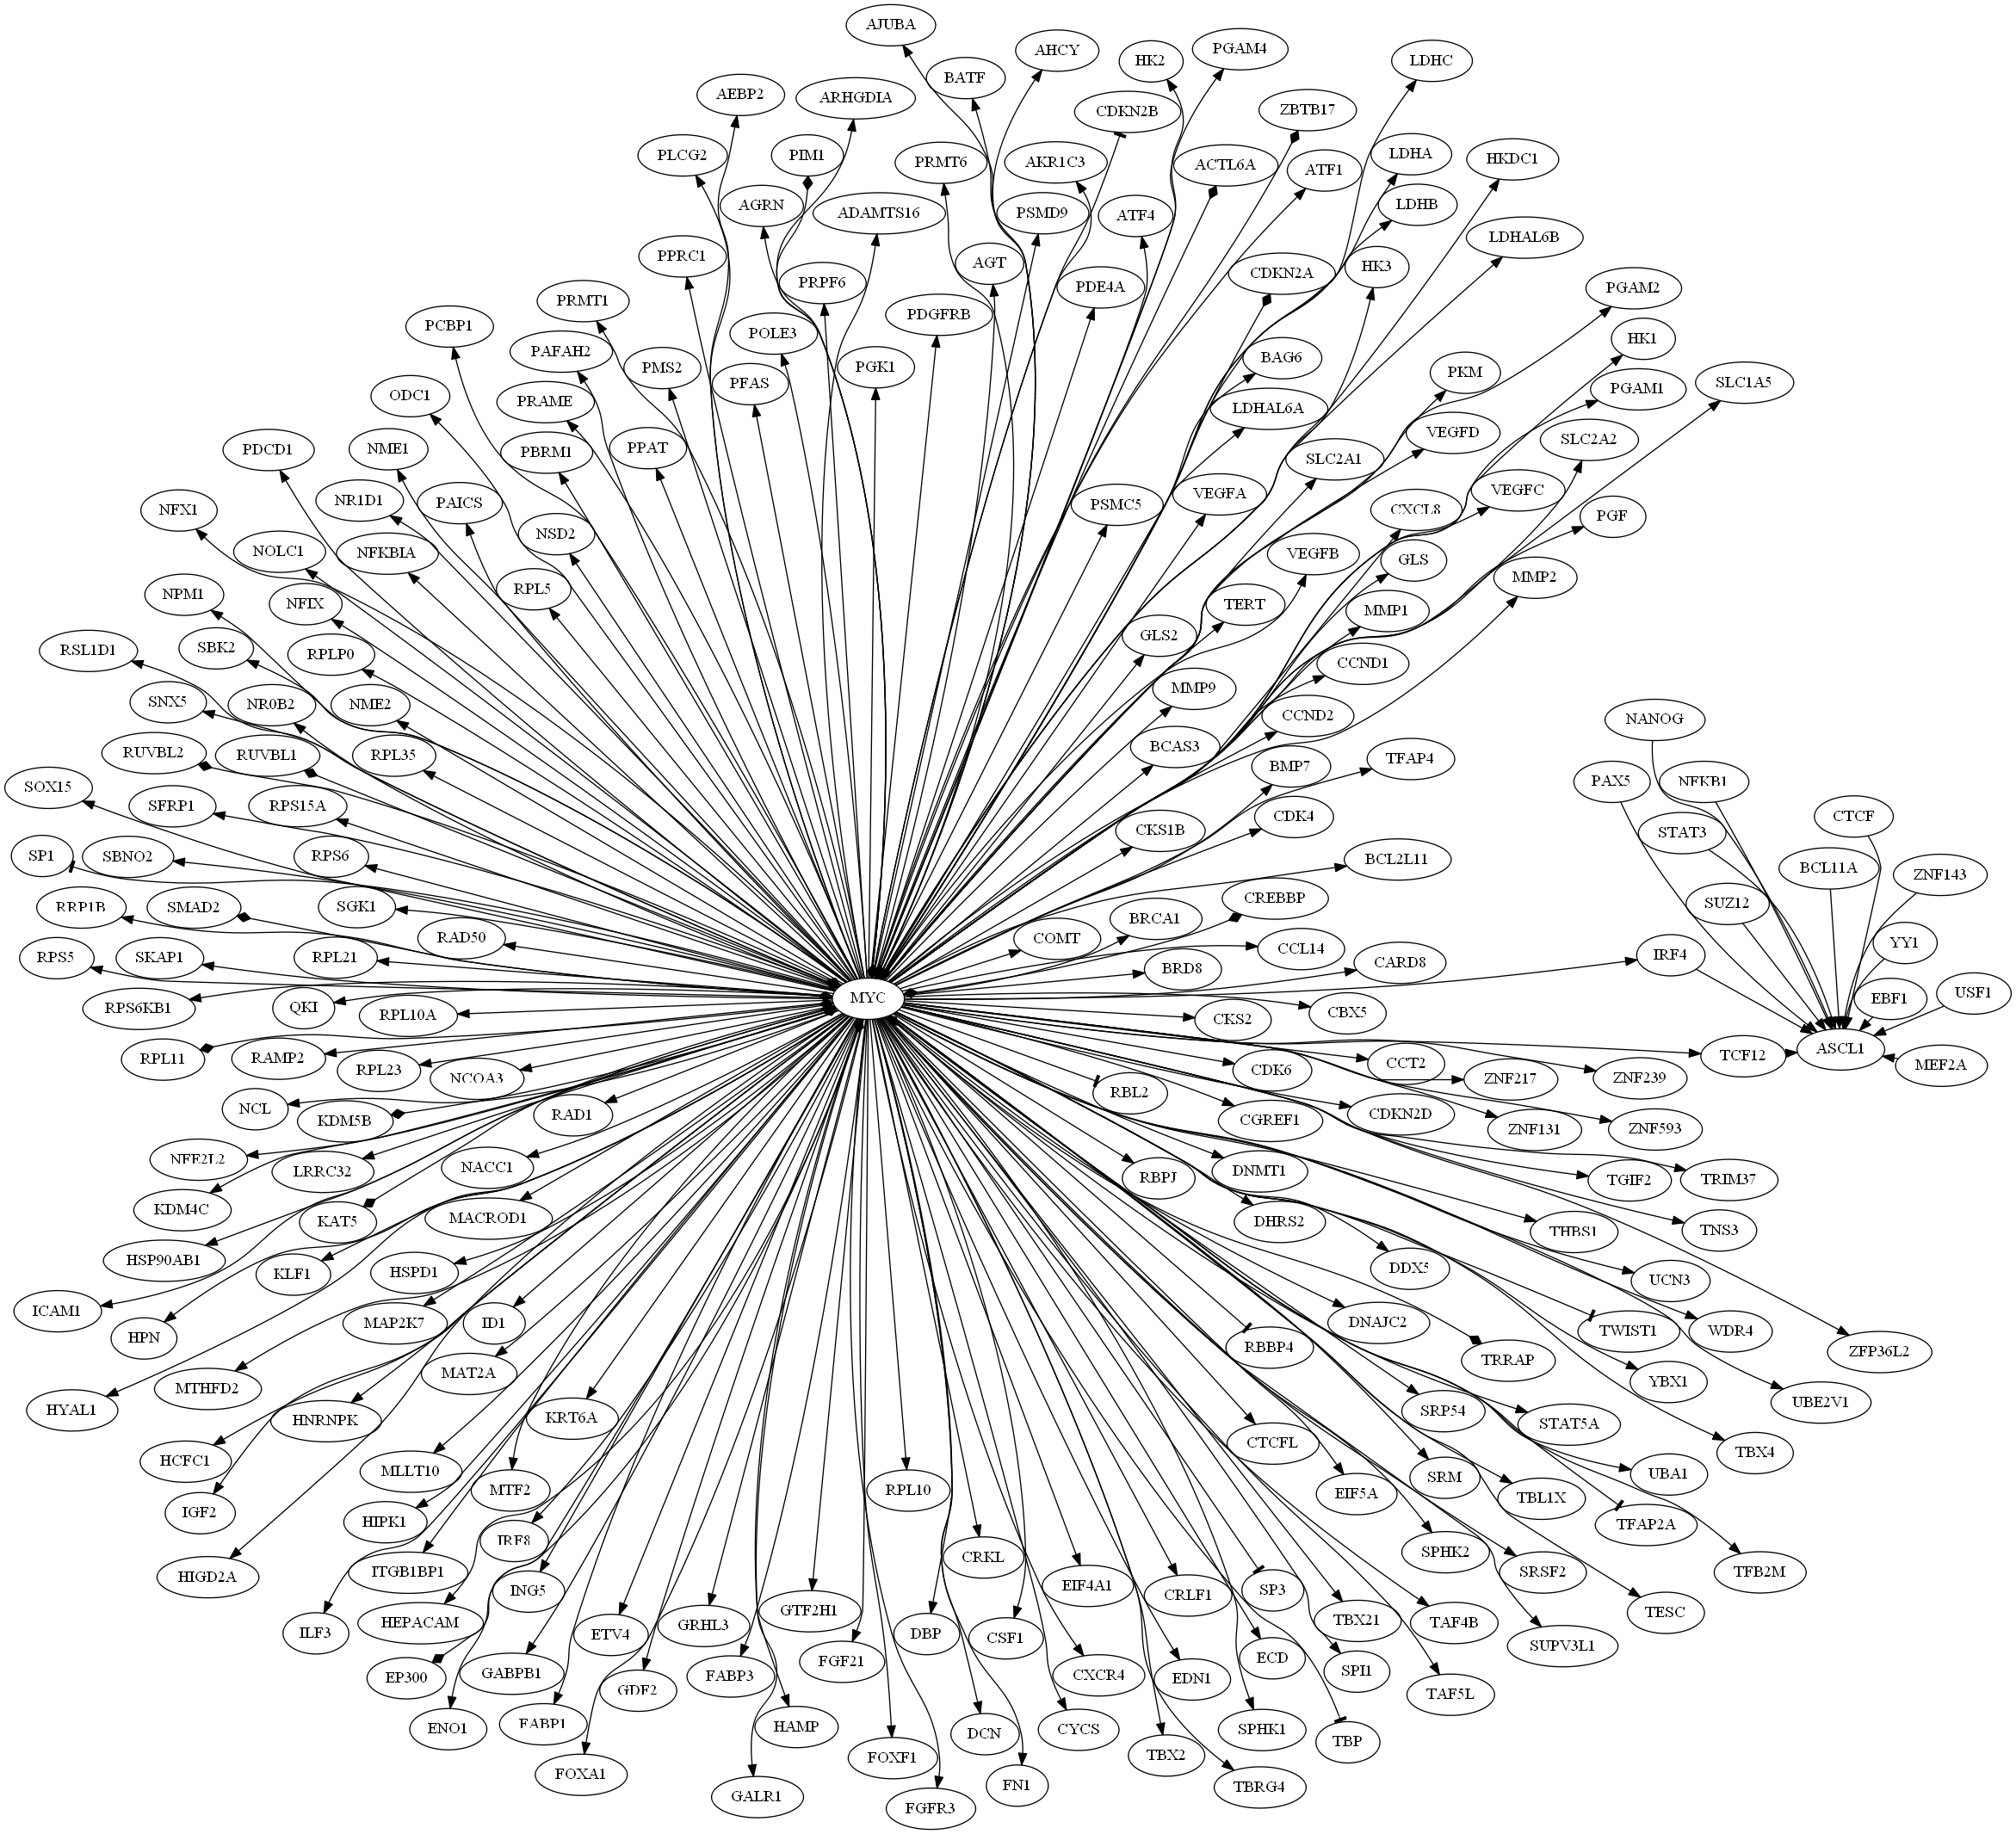

In [24]:
expand = net_sub.expand_neighbors(ascl1_neighbors, nodes='MYC', upstream = False, downstream=True)
draw_graphviz(expand, 'sfdp', width=200)

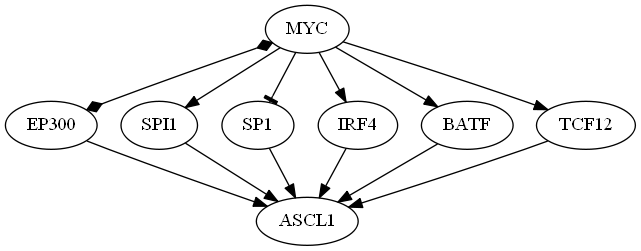

In [125]:
ASCL1_to_AKT = net_sub.paths_between_pair('MYC', 'ASCL1', bidirectional=True)
draw_graphviz(ASCL1_to_AKT)

# EnrichR Analysis

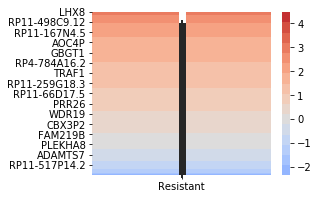

In [25]:
from magine.enrichment.enrichr import Enrichr
e = Enrichr()
const_up_lf = exp_data.rna_seq.up.require_n_sig(n_sig=1, index='label')
const_up_lf.heatmap(figsize=(4,3));

In [52]:
enrich_up_lf = e.run(const_up_lf.id_list, gene_set_lib= 'Reactome_2016')
enrich_up_lf.term_name = enrich_up_lf.term_name.str.split('_').str.get(0)
enrich_up_lf.head(20)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant
0,synthesis of epoxy (eet) and dihydroxyeicosatr...,1,0.005700,11.624434,60.067105,0.999997,"CYP1A1,CYP1A2,CYP1B1,CYP2C19,CYP2C8,CYP2J2,EPHX2",7,Reactome_2016,False
1,dopamine receptors,2,0.007514,62395.000000,305174.386356,0.999997,"DRD1,DRD2,DRD3,DRD4,DRD5",5,Reactome_2016,False
2,muscarinic acetylcholine receptors,3,0.007514,62395.000000,305174.386356,0.999997,"CHRM1,CHRM2,CHRM3,CHRM4,CHRM5",5,Reactome_2016,False
3,synthesis of (16-20)-hydroxyeicosatetraenoic a...,4,0.017280,5.811751,23.585340,0.999997,"CYP1A1,CYP1A2,CYP1B1,CYP2C19,CYP2C8,CYP2U1,CYP4F2",7,Reactome_2016,False
4,response to metal ions,5,0.072793,2.905410,7.612581,0.999997,"MT1E,MT1F,MT1G,MT1M,MT1X,MT2A,MT3",7,Reactome_2016,False
5,metallothioneins bind metals,6,0.072793,2.905410,7.612581,0.999997,"MT1E,MT1F,MT1G,MT1M,MT1X,MT2A,MT3",7,Reactome_2016,False
6,ikba variant leads to eda-id,7,0.074861,4.150146,10.757696,0.999997,"IKBKB,IKBKG,NFKB1,NFKB2,RELA",5,Reactome_2016,False
7,prostanoid ligand receptors,8,0.074958,3.320293,8.602305,0.999997,"PTGDR2,PTGER1,PTGER2,PTGER3,PTGFR,TBXA2R",6,Reactome_2016,False
8,arachidonic acid metabolism,9,0.098304,1.483053,3.440227,0.999997,"ABCC1,AKR1C3,ALOX12,ALOX12B,ALOX15,ALOX5,CBR1,...",25,Reactome_2016,False
9,regulation of kit signaling,10,0.101431,2.134642,4.884867,0.999997,"CBL,FYN,LCK,LYN,PTPN6,SH2B2,SH2B3,SOS1,SRC",9,Reactome_2016,False


,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant
0,g1/s transition,1,6.367419e-08,2.799937,46.393520,0.000082,"CCNA2,CCNB1,CCND1,CCNE1,CCNE2,CCNH,CDC25A,CDC6...",70,Reactome_2016,True
1,cell cycle checkpoints,2,1.107499e-07,2.193585,35.132431,0.000082,"ANAPC10,ANAPC11,ANAPC15,ANAPC16,ATM,BARD1,BRCA...",103,Reactome_2016,True
2,cdt1 association with the cdc6:orc:origin complex,3,2.786493e-07,4.043995,61.037282,0.000106,"CDC6,CDT1,GMNN,MCM8,ORC2,ORC3,ORC4,ORC6,PSMA3,...",41,Reactome_2016,True
3,cell cycle,4,2.866293e-07,1.542755,23.241727,0.000106,"AJUBA,AKAP9,ANAPC10,ANAPC11,ANAPC15,ANAPC16,AR...",270,Reactome_2016,True
4,g2/m checkpoints,5,5.639684e-07,2.258335,32.493525,0.000141,"ATM,BARD1,BRCA1,BRCC3,BRIP1,CCNB1,CCNB2,CDC25A...",86,Reactome_2016,True
5,gene expression,6,6.076358e-07,1.292444,18.499636,0.000141,"ADARB1,ADAT1,AEBP2,AGO2,AIMP1,ALKBH8,ALYREF,AN...",703,Reactome_2016,True
6,g1/s dna damage checkpoints,7,7.216770e-07,3.513540,49.687389,0.000141,"ATM,CCNA2,CCNE1,CCNE2,CDC25A,CDKN1B,CHEK1,MDM2...",44,Reactome_2016,True
7,assembly of the pre-replicative complex,8,7.614463e-07,3.430243,48.325425,0.000141,"CDC6,CDT1,E2F1,GMNN,MCM3,MCM4,MCM6,MCM8,ORC2,O...",45,Reactome_2016,True
8,s phase,9,1.001709e-06,2.403888,33.206832,0.000165,"CCNA2,CCND1,CCNE1,CCNE2,CCNH,CDC25A,CDC6,CDK7,...",73,Reactome_2016,True
9,vif-mediated degradation of apobec3g,10,1.735128e-06,3.875780,51.410007,0.000257,"CUL5,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1,PSMB3,PSMB4...",37,Reactome_2016,True


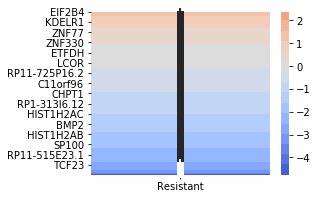

In [26]:
const_dn_lf = exp_data.rna_seq.down.require_n_sig(n_sig=1, index='label')
const_dn_lf.heatmap(figsize=(4,3));

enrich_dn_lf = e.run(const_dn_lf.id_list, gene_set_lib= 'Reactome_2016')
enrich_dn_lf.term_name = enrich_dn_lf.term_name.str.split('_').str.get(0)
enrich_dn_lf.head(20)

In [36]:
enrich_dn_lf.to_csv('LL11.CSV')

In [54]:
e.print_valid_libs()

ARCHS4_Cell-lines
ARCHS4_IDG_Coexp
ARCHS4_Kinases_Coexp
ARCHS4_TFs_Coexp
ARCHS4_Tissues
Achilles_fitness_decrease
Achilles_fitness_increase
Aging_Perturbations_from_GEO_down
Aging_Perturbations_from_GEO_up
Allen_Brain_Atlas_down
Allen_Brain_Atlas_up
BioCarta_2013
BioCarta_2015
BioCarta_2016
BioPlanet_2019
BioPlex_2017
CCLE_Proteomics_2020
CORUM
Cancer_Cell_Line_Encyclopedia
ChEA_2013
ChEA_2015
ChEA_2016
Chromosome_Location
Chromosome_Location_hg19
ClinVar_2019
DSigDB
Data_Acquisition_Method_Most_Popular_Genes
DepMap_WG_CRISPR_Screens_Broad_CellLines_2019
DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
DisGeNET
Disease_Perturbations_from_GEO_down
Disease_Perturbations_from_GEO_up
Disease_Signatures_from_GEO_down_2014
Disease_Signatures_from_GEO_up_2014
DrugMatrix
Drug_Perturbations_from_GEO_2014
Drug_Perturbations_from_GEO_down
Drug_Perturbations_from_GEO_up
ENCODE_Histone_Modifications_2013
ENCODE_Histone_Modifications_2015
ENCODE_TF_ChIP-seq_2014
ENCODE_TF_ChIP-seq_2015
ENCODE_and_ChEA

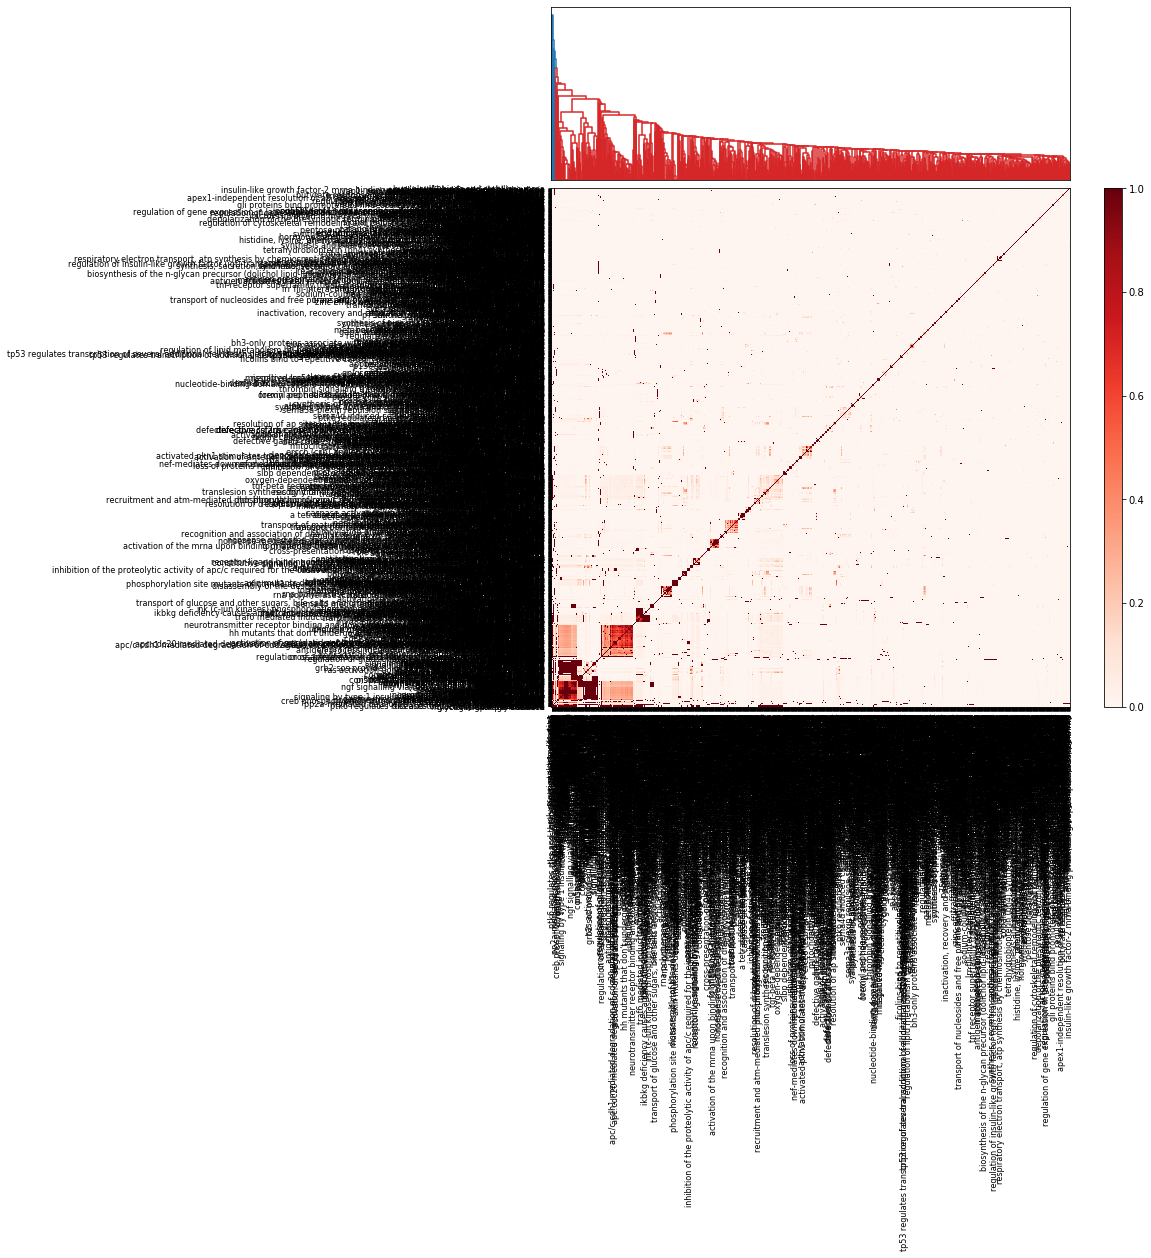

In [59]:
enrich_dn_lf.dist_matrix(figsize=(12, 12));

In [56]:
enrichment_slim = enrich_up_lf.remove_redundant(level='dataframe')

Number of rows went from 1464 to 565


In [27]:
enrichment_slim_down = enrich_dn_lf.remove_redundant(level='dataframe')

Number of rows went from 1480 to 544


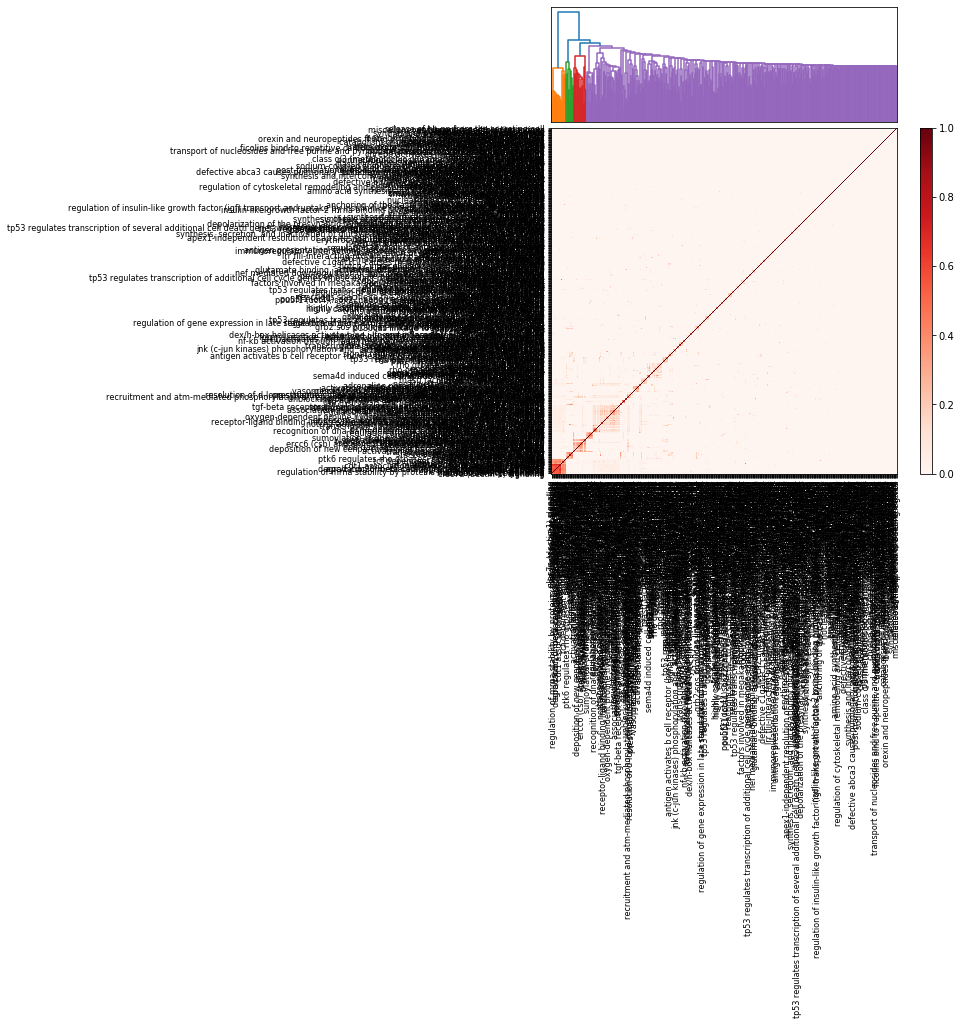

In [61]:
enrichment_slim_down.dist_matrix();

In [29]:
enrichment_slim_down['sample_id'] = 'Sensitive'

In [30]:
enrichment_slim_down.sort_values(by='adj_p_value', inplace=True)

In [33]:
enrichment_slim_down.head(10)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant,sample_id
0,g1/s transition,1,6.367419e-08,2.799937,46.393520,0.000082,"CCNA2,CCNB1,CCND1,CCNE1,CCNE2,CCNH,CDC25A,CDC6...",70,Reactome_2016,True,Sensitive
2,cdt1 association with the cdc6:orc:origin complex,3,2.786493e-07,4.043995,61.037282,0.000106,"CDC6,CDT1,GMNN,MCM8,ORC2,ORC3,ORC4,ORC6,PSMA3,...",41,Reactome_2016,True,Sensitive
6,g1/s dna damage checkpoints,7,7.216770e-07,3.513540,49.687389,0.000141,"ATM,CCNA2,CCNE1,CCNE2,CDC25A,CDKN1B,CHEK1,MDM2...",44,Reactome_2016,True,Sensitive
4,g2/m checkpoints,5,5.639684e-07,2.258335,32.493525,0.000141,"ATM,BARD1,BRCA1,BRCC3,BRIP1,CCNB1,CCNB2,CDC25A...",86,Reactome_2016,True,Sensitive
8,s phase,9,1.001709e-06,2.403888,33.206832,0.000165,"CCNA2,CCND1,CCNE1,CCNE2,CCNH,CDC25A,CDC6,CDK7,...",73,Reactome_2016,True,Sensitive
9,vif-mediated degradation of apobec3g,10,1.735128e-06,3.875780,51.410007,0.000257,"CUL5,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1,PSMB3,PSMB4...",37,Reactome_2016,True,Sensitive
31,rrna processing,32,9.822699e-06,1.920216,22.141659,0.000455,"BOP1,C1D,DCAF13,DDX52,ELAC2,EXOSC10,EXOSC6,EXO...",96,Reactome_2016,True,Sensitive
36,mitotic metaphase and anaphase,37,1.196620e-05,1.928790,21.859791,0.000479,"ANAPC10,ANAPC11,ANAPC15,ANAPC16,BANF1,BIRC5,BU...",93,Reactome_2016,True,Sensitive
40,apc/c:cdc20 mediated degradation of mitotic pr...,41,1.377721e-05,2.754130,30.825589,0.000498,"ANAPC10,ANAPC11,ANAPC15,ANAPC16,BUB1B,CCNA2,CC...",46,Reactome_2016,True,Sensitive
47,er-phagosome pathway,48,2.421720e-05,2.862891,30.428091,0.000747,"B2M,CALR,HLA-E,HLA-F,HLA-G,PDIA3,PSMA3,PSMA4,P...",41,Reactome_2016,True,Sensitive


In [34]:
e_plot = enrichment_slim_down.head(5)

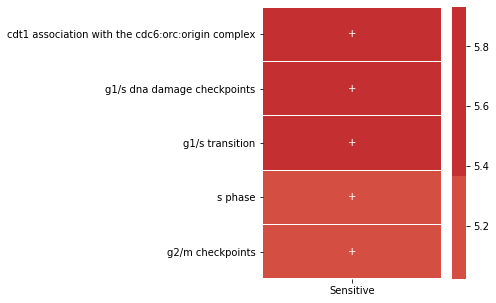

In [35]:

e_plot.heatmap(
    figsize=(4,5),
    linewidths=0.01,
    cluster_by_set=False
);

In [89]:
enrich_dn_lf['sample_id'] = 'sensitive'

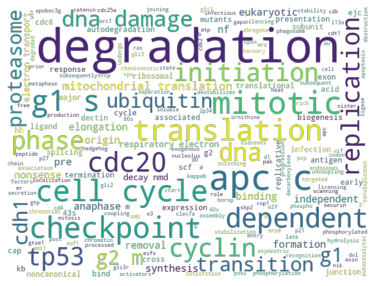

In [54]:
from magine.plotting.wordcloud_tools import create_wordcloud
wc = create_wordcloud(enrich_dn_lf.sig)
wc.plot();

In [101]:
enrich_dn_lf.term_name = enrich_dn_lf.term_name.str.split('_').str.get(0)
enrich_dn_lf.head(30)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant,sample_id
2,cdt1 association with the cdc6:orc:origin complex,3,2.786493e-07,4.043995,61.037282,0.000106,"CDC6,CDT1,GMNN,MCM8,ORC2,ORC3,ORC4,ORC6,PSMA3,...",41,Reactome_2016,True,sensitive
9,vif-mediated degradation of apobec3g,10,1.735128e-06,3.875780,51.410007,0.000257,"CUL5,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1,PSMB3,PSMB4...",37,Reactome_2016,True,sensitive
6,g1/s dna damage checkpoints,7,7.216770e-07,3.513540,49.687389,0.000141,"ATM,CCNA2,CCNE1,CCNE2,CDC25A,CDKN1B,CHEK1,MDM2...",44,Reactome_2016,True,sensitive
7,assembly of the pre-replicative complex,8,7.614463e-07,3.430243,48.325425,0.000141,"CDC6,CDT1,E2F1,GMNN,MCM3,MCM4,MCM6,MCM8,ORC2,O...",45,Reactome_2016,True,sensitive
15,ubiquitin mediated degradation of phosphorylat...,16,3.268792e-06,3.770523,47.625817,0.000292,"ATM,CDC25A,CHEK1,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1...",36,Reactome_2016,True,sensitive
14,p53-independent g1/s dna damage checkpoint,15,3.268792e-06,3.770523,47.625817,0.000292,"ATM,CDC25A,CHEK1,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1...",36,Reactome_2016,True,sensitive
13,p53-independent dna damage response,14,3.268792e-06,3.770523,47.625817,0.000292,"ATM,CDC25A,CHEK1,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1...",36,Reactome_2016,True,sensitive
0,g1/s transition,1,6.367419e-08,2.799937,46.393520,0.000082,"CCNA2,CCNB1,CCND1,CCNE1,CCNE2,CCNH,CDC25A,CDC6...",70,Reactome_2016,True,sensitive
25,autodegradation of the e3 ubiquitin ligase cop1,26,6.109497e-06,3.665295,44.004305,0.000348,"ATM,PSMA3,PSMA4,PSMA5,PSMA7,PSMB1,PSMB3,PSMB4,...",35,Reactome_2016,True,sensitive
10,p53-dependent g1/s dna damage checkpoint,11,2.391463e-06,3.352933,43.399045,0.000292,"ATM,CCNA2,CCNE1,CCNE2,CDKN1B,MDM2,PCBP4,PSMA3,...",42,Reactome_2016,True,sensitive


In [104]:
sorted(enrichment_slim_down.term_name.unique())

['2-ltr circle formation',
 'a third proteolytic cleavage releases nicd',
 'abacavir transmembrane transport',
 'abc transporters in lipid homeostasis',
 'acetylcholine neurotransmitter release cycle',
 'acetylcholine regulates insulin secretion',
 'activated tak1 mediates p38 mapk activation',
 'activation of gabab receptors',
 'activation of hox genes during differentiation',
 'activation of irf3/irf7 mediated by tbk1/ikk epsilon',
 'activation of kainate receptors upon glutamate binding',
 'activation of nf-kappab in b cells',
 'activation of nima kinases nek9, nek6, nek7',
 'activation of rac',
 'activation of ras in b cells',
 'activation of the phototransduction cascade',
 'acyl chain remodelling of pc',
 'acyl chain remodelling of pg',
 'adherens junctions interactions',
 'adp signalling through p2y purinoceptor 1',
 'adp signalling through p2y purinoceptor 12',
 'adrenaline,noradrenaline inhibits insulin secretion',
 'adrenoceptors',
 'advanced glycosylation endproduct receptor

In [40]:
all_terms = list(enrichment_slim_down['term_name'].values)

In [46]:
from magine.networks.annotated_set import create_asn
# selected terms of interest
terms=['g1/s dna damage checkpoints', 'regulation of apoptosis',  'programmed cell death',  'yap1- and wwtr1 (taz)-stimulated gene expression', 'p53-dependent g1 dna damage response', 'p53-independent dna damage response	']

term_net, mol_net = create_asn(
    enrichment_slim_down, network,
    terms=terms,
    save_name='all_example',
    use_threshold=True,
    use_cytoscape=False, # If you have cytoscape open, this will create a cytoscape session if True
)

Creating ontology network


In [47]:
mol_net.number_of_edges()

399

In [48]:
term_net.number_of_edges()

4

In [52]:
draw_cyjs(mol_net, add_parent=True)

In [53]:
draw_cyjs(term_net, add_parent=False)